# Regression Linéaire avec Numpy :
* https://machinelearnia.com/regression-lineaire-python/ *


In [42]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## 1. DataSet :

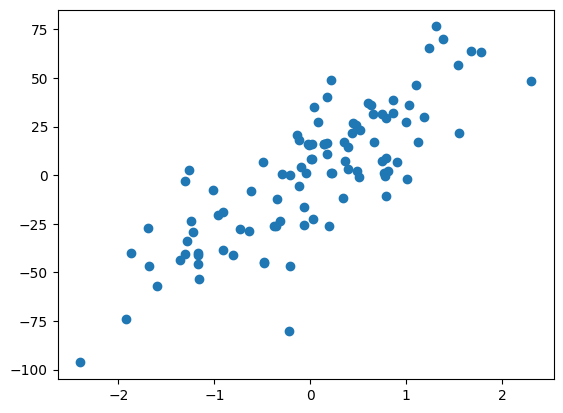

In [43]:
x,y = make_regression(n_samples = 100 , n_features = 1 , noise = 20)
plt.scatter(x, y)

On vérifie les dimensions de nos matrices générées :

In [44]:
print(x.shape) #return a tuple (ligne,column)
print(y.shape)
y = y.reshape(y.shape[0], 1) # il est vivement conseillé de redéfinir les dimensions de la matrice y
print(y.shape)

(100, 1)
(100,)
(100, 1)


**On construit une matrice 'X' qui sera la matrice 'x' avec la colonne de biais:**(on utilise l'horizontal stack de numpy pour coller les 2 matrices)

In [45]:
X = np.hstack((x,np.ones(x.shape)))
print(X.shape)
print(X)

(100, 2)
[[ 0.43625893  1.        ]
 [-1.35665743  1.        ]
 [ 0.36037799  1.        ]
 [-0.06713538  1.        ]
 [ 0.34418751  1.        ]
 [ 0.02181257  1.        ]
 [ 1.00530829  1.        ]
 [-0.49076481  1.        ]
 [-0.22229987  1.        ]
 [-1.30576501  1.        ]
 [ 0.44564302  1.        ]
 [ 0.00336975  1.        ]
 [-1.17175482  1.        ]
 [ 0.74208921  1.        ]
 [-0.01522924  1.        ]
 [ 0.3938042   1.        ]
 [ 0.63437863  1.        ]
 [-1.6921675   1.        ]
 [ 0.64858535  1.        ]
 [-1.86852259  1.        ]
 [-0.640866    1.        ]
 [ 1.03034827  1.        ]
 [ 0.99385401  1.        ]
 [ 1.77636924  1.        ]
 [ 0.86223697  1.        ]
 [-0.48048438  1.        ]
 [ 1.67831107  1.        ]
 [ 0.47792935  1.        ]
 [ 0.17034545  1.        ]
 [ 0.14069344  1.        ]
 [ 0.48929221  1.        ]
 [ 1.23892196  1.        ]
 [-0.35758497  1.        ]
 [ 1.184506    1.        ]
 [-0.73500544  1.        ]
 [-2.39828277  1.        ]
 [-0.02574397  1.  

**On définit le vecteur qui caractérise notre modèle linéaire y = ax+b :**


In [46]:
theta = np.random.randn(2,1) #on initialise le vecteur Theta par des valuers aléatoires :
theta

array([[0.7083633 ],
       [0.32148895]])

## 2. Contruction du modèle linéaire : F=X.θ

In [47]:
def model (X, theta):
    return X.dot(theta)

In [48]:
model(X,theta) # on teste la fonction model pour voir si on n'a pas fait d'erreur

array([[ 0.63051877],
       [-0.63951738],
       [ 0.57676749],
       [ 0.27393271],
       [ 0.56529875],
       [ 0.33694017],
       [ 1.03361245],
       [-0.02615083],
       [ 0.16401988],
       [-0.60346706],
       [ 0.63716611],
       [ 0.32387596],
       [-0.50853916],
       [ 0.84715772],
       [ 0.31070111],
       [ 0.6004454 ],
       [ 0.77085949],
       [-0.8771804 ],
       [ 0.78092301],
       [-1.00210387],
       [-0.132477  ],
       [ 1.05134985],
       [ 1.02549866],
       [ 1.57980373],
       [ 0.93226598],
       [-0.01886855],
       [ 1.51034292],
       [ 0.66003657],
       [ 0.44215542],
       [ 0.42115102],
       [ 0.6680856 ],
       [ 1.1990958 ],
       [ 0.06818888],
       [ 1.16054953],
       [-0.19916193],
       [-1.37736654],
       [ 0.30325287],
       [ 0.68031751],
       [ 0.57257877],
       [-0.02362926],
       [ 0.44316745],
       [ 0.44042632],
       [ 0.27421439],
       [ 0.96271985],
       [ 0.34311973],
       [-0

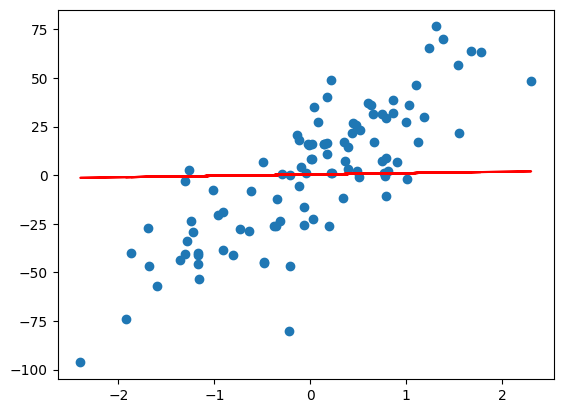

In [49]:
plt.plot(x , model(X,theta), color = 'r')
plt.scatter(x,y)

==> la pente dépend du paramètre **a** choisi aléatoirement en haut.

## 3. La fonction Coût : (l'erreur quadratique moyenne)

In [50]:
def cost_function (X, y, theta) :
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y) **2)
    
    

In [51]:
cost_function(X,y,theta)

554.0411880899519

## 4. Gradients et Descente de gradients :

In [52]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta) - y)
    

In [53]:
def gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000):  #parametres par defaut  0.01 et 1000

    cost_history = np.zeros(n_iterations)#  pour la courbe d'apprentissage
    for i in range (0,n_iterations) :
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X,y,theta)
        
    return theta, cost_history , n_iterations
    

## 5. Machine Leaning :


In [54]:
theta_final, cost_history,n_iterations = gradient_descent(X,y,theta,learning_rate=0.01,n_iterations=1000) #passage d'arguments

In [55]:
print(theta_final)

[[29.87558556]
 [ 0.28002456]]


In [56]:
predictions = model(X,theta_final)

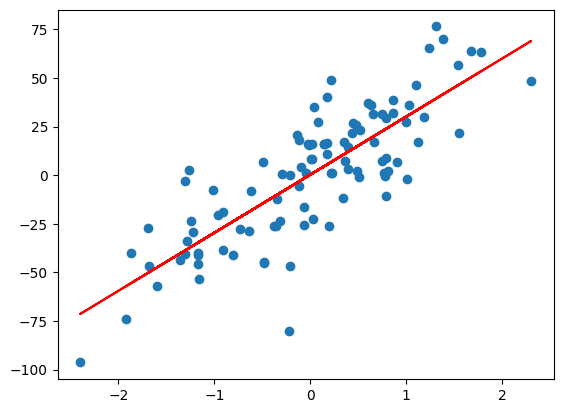

In [57]:
#Comparaison du modèle avec le dataset :

plt.scatter(x,y)
plt.plot(x,predictions,color='r')

In [58]:
print(f"le modèle final est y = {str(theta_final[0])}* x + {str(theta_final[1])}")

le modèle final est y = [29.87558556]* x + [0.28002456]


## 5.1 Courbe d'apprentissage :


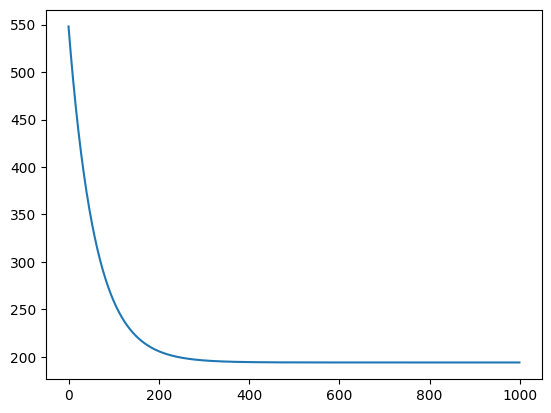

In [59]:
plt.plot(np.arange(n_iterations), cost_history) #il faut que les 2 variable aient la meme dimension

## 5.2 Coefficient de determination :

![Alt text](image.png)

En bref :

![Alt text](image-1.png)

In [60]:
def coef_determination (y, predictions):
    u = ((y - predictions)**2).sum()
    v = ((y - y.mean())**2).sum()
    return f"{round((1 - u/v)*100),2}%"

In [61]:
coef_determination (y, predictions)

'(66, 2)%'